In [2]:
#!pip install scikit-learn


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [4]:
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

In [5]:
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Fase 1: Exploración y Limpieza

In [6]:
# 1: cargar los ficheros y exploracion :

In [7]:
pd.set_option('display.max_columns', None)
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_loyality = pd.read_csv("Customer Loyalty History.csv")

In [8]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [9]:
df_flight.shape

(405624, 10)

In [10]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [ ]:
# ver los valores unicos de todas columnas:
for columna in df_flight.columns:
    print(f"Valores únicos en '{columna}':")
    print(df_flight[columna].unique().tolist()
)
    print("\n")

Valores únicos en 'Loyalty Number':
[100018, 100102, 100140, 100214, 100272, 100301, 100364, 100380, 100428, 100504, 100550, 863070, 100590, 100642, 100644, 100646, 100727, 100737, 100753, 100816, 100853, 100883, 100890, 101018, 101148, 101356, 101363, 691626, 101515, 101540, 101544, 101547, 101581, 101594, 101644, 101663, 101664, 101768, 101895, 101902, 101945, 102168, 102184, 102207, 102299, 102308, 102311, 102376, 102464, 102615, 102726, 102730, 102740, 102788, 159942, 102877, 102982, 103043, 103151, 103217, 103304, 103340, 103352, 103359, 103362, 103383, 103436, 103490, 103502, 103536, 103699, 103731, 103758, 103823, 103860, 103862, 103916, 103969, 103970, 103975, 103985, 104103, 104267, 104353, 627915, 104586, 104673, 104732, 104739, 104849, 104960, 105063, 105073, 105074, 105145, 105193, 105214, 471706, 105352, 105552, 105688, 105700, 105712, 105789, 105835, 105841, 105921, 105932, 105992, 106001, 106037, 106038, 106046, 106048, 107119, 106397, 106444, 106477, 106589, 106592, 106

In [12]:
# ver valores de Month y si necesitan algun cambio : 
df_flight['Month'].unique().tolist()


[1, 9, 2, 3, 11, 4, 5, 7, 6, 8, 10, 12]

In [13]:
# Crear un diccionario con los números de mes y sus nombres
months = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Convertir la columna Month usando map()
df_flight['Month'] = df_flight['Month'].map(months).astype('object')

In [ ]:
# ver los estadisticas de las columnas numericas:
df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.0,550834.0,772194.0,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.0,2017.5,2018.0,2018.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.0,1.0,8.0,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.0,0.0,1.0,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.0,1.0,10.0,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.0,488.0,2336.0,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.0,50.0,239.0,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.0,0.0,0.0,71.0


In [15]:
# comprobar si hay valores nulos: 

df_flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [ ]:
# comprobar si hay valores duplicados: 
df_flight.duplicated().sum()

1864

In [17]:
df_flight.shape[0]

405624

In [18]:
# eliminar registros duplicados:
df_flight.drop_duplicates(inplace=True)

In [19]:
df_flight.shape[0]

403760

In [20]:
# Convertir los nombres de las columnas a minúsculas y eliminar espacios
df_flight.columns = df_flight.columns.str.lower().str.replace(' ', '_')

# Verificar el resultado
df_flight.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

In [21]:
# vamos a explorar otro fichero, de loyality:

In [22]:
df_loyality.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [23]:
df_loyality.shape

(16737, 16)

In [24]:
# explorar si tipo de columnas necesitan algun cambio y si hay valores nulos: 
df_loyality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [ ]:
# ver los valores unicos de todas las columnas: 
for columna in df_loyality.columns:
    print(f"Valores únicos en '{columna}':")
    print(df_loyality[columna].unique().tolist()
)
    print("\n")


Valores únicos en 'Loyalty Number':
[480934, 549612, 429460, 608370, 530508, 193662, 927943, 188893, 852392, 866307, 932823, 144514, 611765, 988178, 286114, 205785, 735304, 438936, 172755, 354730, 413741, 552965, 642313, 263080, 109767, 217754, 157005, 557752, 608758, 599341, 333502, 201574, 403361, 543918, 806030, 119200, 938981, 238119, 730388, 834891, 127400, 324557, 742002, 536567, 704835, 733338, 758635, 823048, 612905, 679908, 704150, 869743, 596179, 370450, 501030, 878633, 285938, 588237, 645280, 864324, 124678, 186015, 461108, 589580, 623688, 386082, 256147, 329382, 140392, 112522, 230908, 972581, 357549, 330694, 910875, 501704, 529098, 265297, 567875, 688524, 269070, 387705, 923293, 283314, 322102, 789157, 654748, 984713, 114835, 328936, 845864, 645265, 223587, 158560, 417584, 566033, 472521, 425854, 174896, 695855, 699511, 377322, 511053, 890753, 796670, 556136, 513081, 930718, 235872, 881142, 295147, 306110, 295217, 967300, 591731, 326905, 375511, 485283, 920716, 797685, 216

In [26]:
# Convertir la columna Month usando map()
months = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

df_loyality['Enrollment Month'] = df_loyality['Enrollment Month'].map(months).astype('object')

In [27]:
df_loyality.duplicated().sum()

0

In [28]:

# % nulos ordenados de mayor a menor
nulos = df_loyality.isnull().sum()/df_loyality.shape[0]*100
nulos.sort_values(ascending=False)


Cancellation Year     87.650117
Cancellation Month    87.650117
Salary                25.321145
Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
dtype: float64

In [29]:
# porcentage muy alto de valores nulos y eliminarlos( no son importantes)
df_loyality.drop(['Cancellation Year','Cancellation Month'], axis=1, inplace =True)


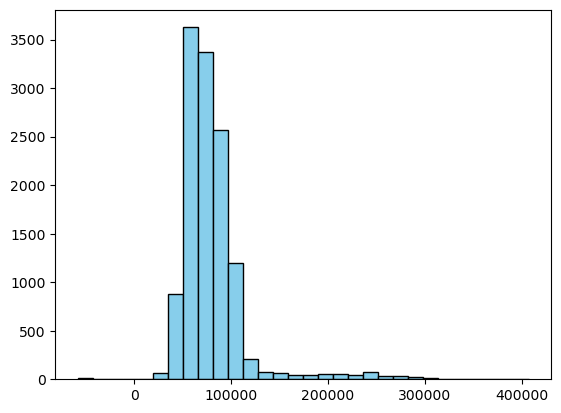

In [30]:
plt.hist(df_loyality['Salary'].dropna(), bins=30, color='skyblue', edgecolor='black');



In [31]:
#porcentage alto de nulos_ imputacion con tecnicas avanzados.
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_loyality['Salary'] = imputer_iter.fit_transform(df_loyality[['Salary']])

In [ ]:
# comprobar si hay valores nulos: 

nulos = df_loyality.isnull().sum()/df_loyality.shape[0]*100
nulos


Loyalty Number      0.0
Country             0.0
Province            0.0
City                0.0
Postal Code         0.0
Gender              0.0
Education           0.0
Salary              0.0
Marital Status      0.0
Loyalty Card        0.0
CLV                 0.0
Enrollment Type     0.0
Enrollment Year     0.0
Enrollment Month    0.0
dtype: float64

In [33]:
# Convertir los nombres de las columnas a minúsculas y eliminar espacios
df_loyality.columns = df_loyality.columns.str.lower().str.replace(' ', '_')

# Verificar el resultado
print(df_flight.columns)

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')


In [ ]:
# unir los dos ficheros
df_final= df_flight.merge(df_loyality, on =["loyalty_number"], how = "left")
df_final.shape

(403760, 23)

In [ ]:
# comprobar si hay valores duplicados: 
df_final.duplicated().sum()

0

In [36]:
# ver las columnas final:
df_final.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month'],
      dtype='object')

In [ ]:
# comprobar si hay valores nulos: 
df_final.isnull().sum()

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
country                        0
province                       0
city                           0
postal_code                    0
gender                         0
education                      0
salary                         0
marital_status                 0
loyalty_card                   0
clv                            0
enrollment_type                0
enrollment_year                0
enrollment_month               0
dtype: int64

In [38]:
df_final.sample(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
368904,937742,2018,October,2,0,2,724,72.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79245.609409,Married,Nova,8093.41,Standard,2014,February
1695,192994,2017,January,12,4,16,1568,156.0,0,0,Canada,Alberta,Banff,T4V 1D4,Male,High School or Below,63422.000000,Married,Aurora,13171.01,Standard,2014,March


In [39]:
# guardar el ficheri limpio en una dataset : 
df_final.to_csv('data_final.csv',index=False)



## fase 2: Visualización

In [40]:
 
### ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

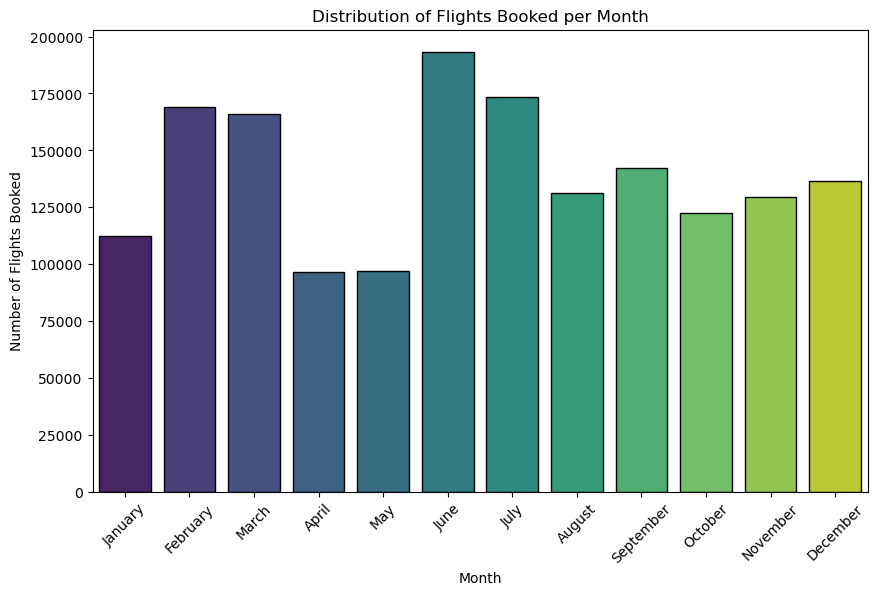

In [41]:
# Agrupar por los nombres de los meses
flights_by_month = df_final.groupby('month')['flights_booked'].sum().reset_index()

# Visualizar la distribución
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='flights_booked', data=flights_by_month, palette='viridis', edgecolor='black')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.title('Distribution of Flights Booked per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights Booked')
plt.show()

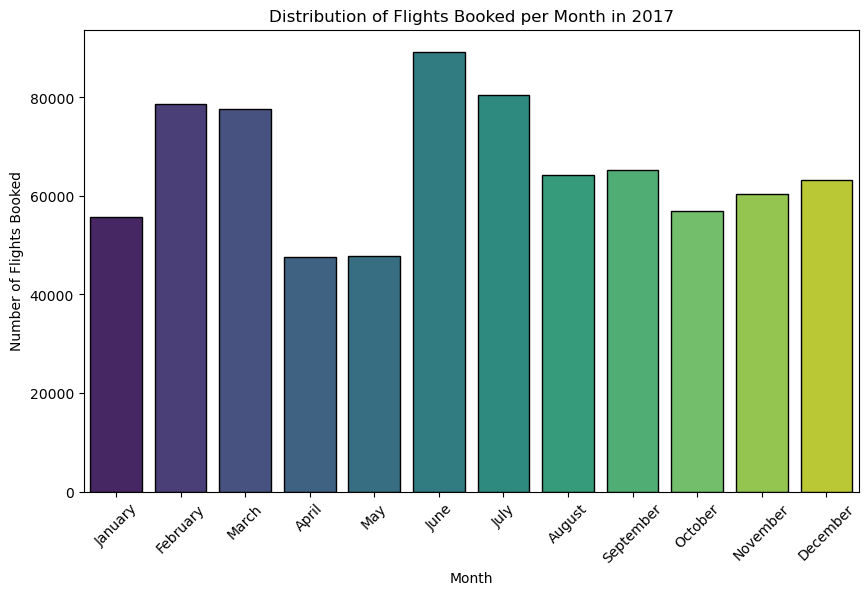

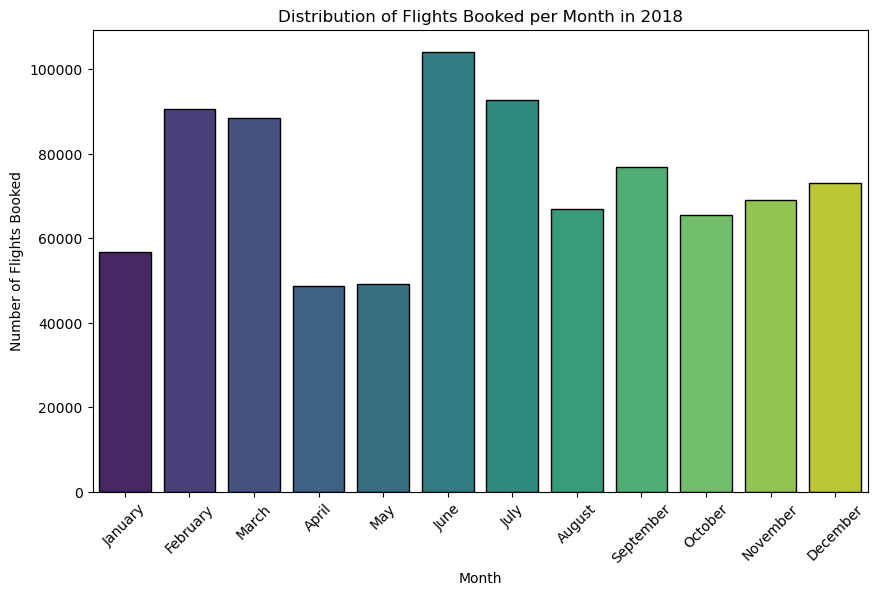

In [42]:
for year in df_final['year'].unique():
    df_year = df_final[df_final['year'] == year]
    flights_by_month = df_year.groupby('month')['flights_booked'].sum().reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='month', y='flights_booked', data=flights_by_month, palette='viridis', edgecolor='black');
    plt.title(f'Distribution of Flights Booked per Month in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Flights Booked')
    plt.xticks(rotation=45,ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'])
    plt.show();

In [43]:
# 2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [44]:
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_final, color='green')

plt.title('Distance vs Points Accumulated')
plt.xlabel('Distance Flown')
plt.ylabel('Points Accumulated')
plt.show()

ValueError: Could not interpret value `Distance` for `x`. An entry with this name does not appear in `data`.

como nos muestra el scatterplot los puntos forman una relacion lineal (positivos) entre la distancia y los puntos acumulados.

In [ ]:
#3. ¿Cuál es la distribución de los clientes por provincia o estado?

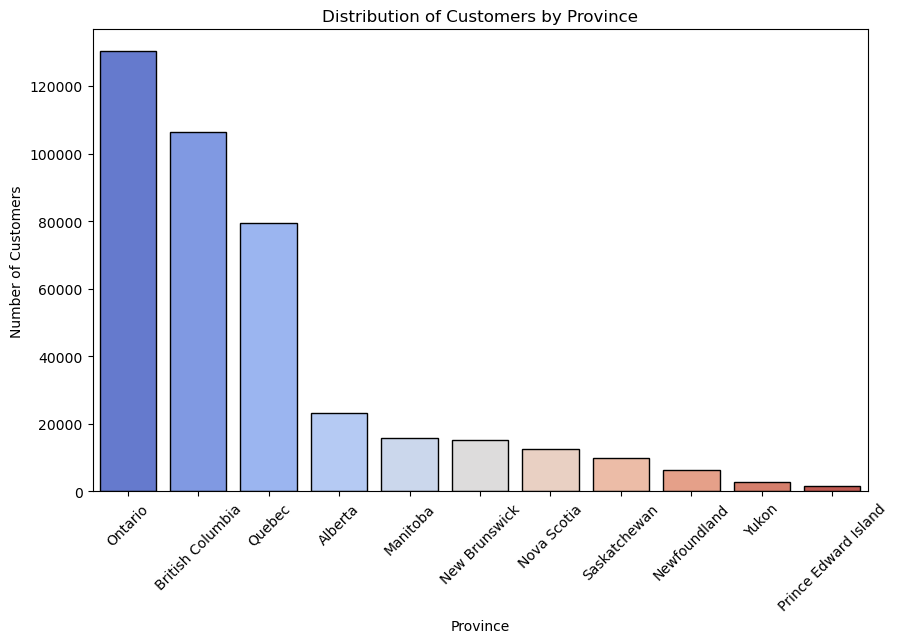

In [74]:
province_order = df_final['province'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(x='province', data=df_final, order=province_order, palette='coolwarm', edgecolor='black');

plt.title('Distribution of Customers by Province')
plt.xlabel('Province')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Si las etiquetas son largas, las rotamos
plt.show();

In [ ]:
#4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

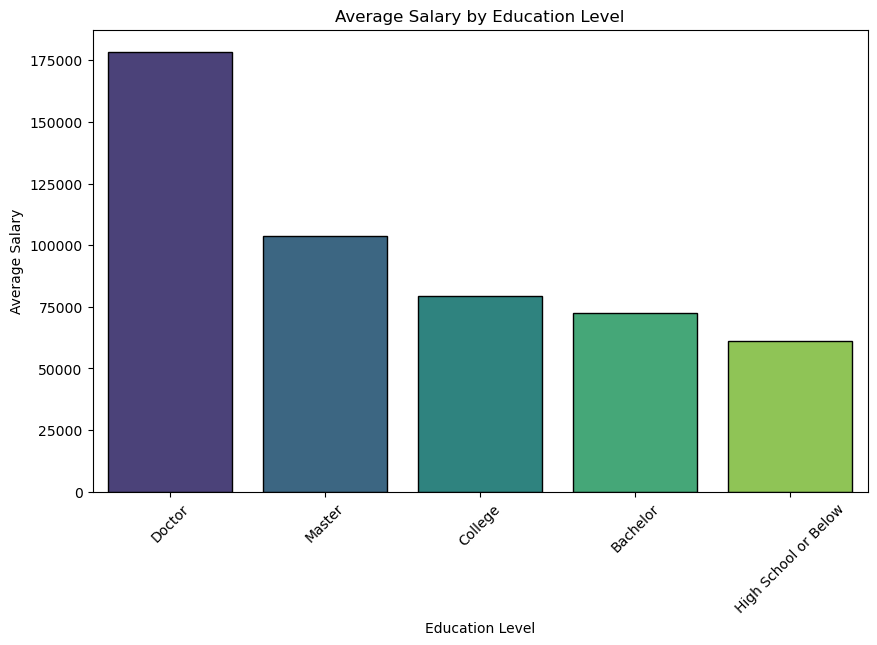

In [73]:
salario_promedio = df_final.groupby('education')['salary'].mean().reset_index()
salario_promedio = salario_promedio.sort_values(by='salary', ascending=False)
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='salary', data=salario_promedio, palette='viridis', edgecolor='black')

plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 5¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

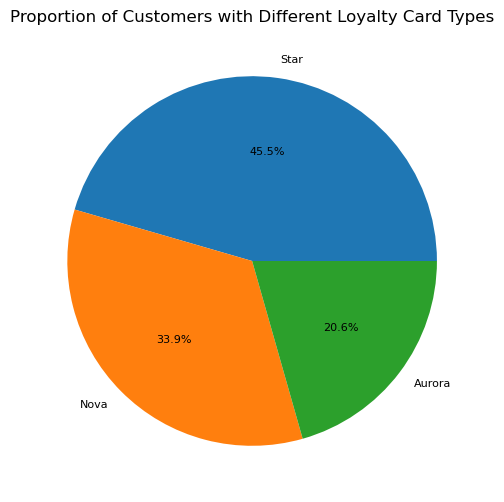

In [63]:
# Contamos las frecuencias de cada tipo de tarjeta y calculamos las proporciones
tarjetas_proporcion = df_final['loyalty_card'].value_counts(normalize=True)
# Crear gráfico de pastel con el formato solicitado
plt.figure(figsize=(8, 6))
plt.pie(tarjetas_proporcion, labels=tarjetas_proporcion.index, textprops={'fontsize': 8}, autopct='%1.1f%%');

# Título
plt.title('Proportion of Customers with Different Loyalty Card Types')

# Mostrar gráfico
plt.show()

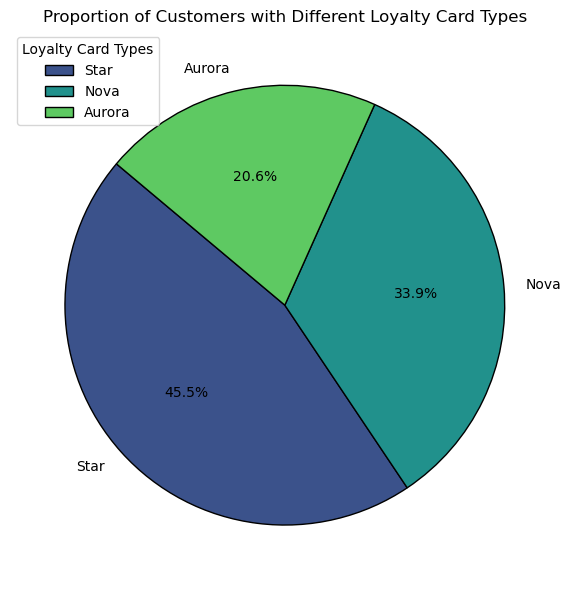

In [50]:
# Contar y calcular proporciones
tarjetas_proporcion = df_final['loyalty_card'].value_counts(normalize=True)

# Crear la paleta de colores
colors = sns.color_palette('viridis', len(tarjetas_proporcion))

# Crear gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(tarjetas_proporcion, labels=tarjetas_proporcion.index, 
        textprops={'fontsize': 10}, autopct='%1.1f%%', 
        colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Título
plt.title('Proportion of Customers with Different Loyalty Card Types', fontsize=12)

# Agregar una leyenda
plt.legend(tarjetas_proporcion.index, title="Loyalty Card Types", loc="best")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

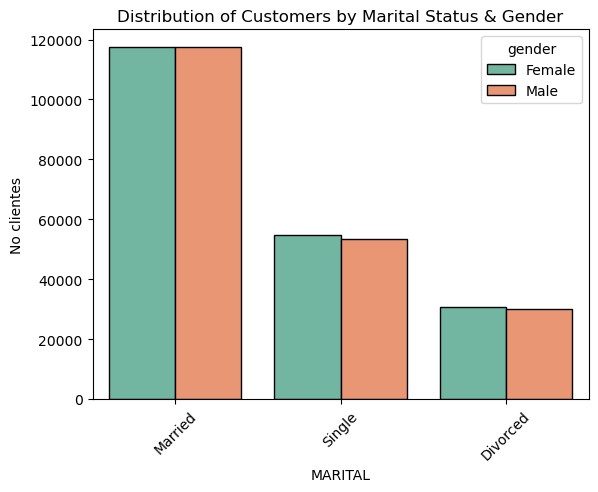

In [64]:
order_marital = df_final['marital_status'].value_counts().index
order_marital

sns.countplot(x="marital_status", data=df_final, order=order_marital, hue="gender",  palette='Set2', edgecolor='black');
plt.title('Distribution of Customers by Marital Status & Gender')
plt.xticks(rotation=45);
plt.xlabel("MARITAL")
plt.ylabel("No clientes")

plt.show()

BONUS: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo


In [66]:
# paso 1: Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
# Filtrar las columnas relevantes
df_filtered = df_final[['flights_booked', 'education']]

# Mostrar las primeras filas para verificar el filtrado
df_filtered.head()

,flights_booked,education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


In [69]:
#paso 2: Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas 
#básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo: 
education_stats = df_filtered.groupby('education')['flights_booked'].describe()

# Mostrar estadísticas descriptivas
education_stats

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


In [70]:
#paso 3: Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
#significativa en el número de vuelos reservados entre los diferentes niveles educativos: 
import scipy.stats as stats

# Realizar la prueba ANOVA
anova_result = stats.f_oneway(*[df_filtered[df_filtered['education'] == level]['flights_booked'] for level in df_filtered['education'].unique()])

# Mostrar el resultado de la prueba ANOVA
print('Estadístico F:', anova_result.statistic)
print('Valor p:', anova_result.pvalue)

Estadístico F: 3.57895773849834
Valor p: 0.00635298173601954
